In [1]:
### ARQUIVO FINALIZADO ###

In [2]:
### ROTINA DE TRABALHO: ###

# *Cada arquivo contém somente um dado número de pontos (N = 500; 100; 50; 10);
# *Uma distribuição simulada por arquivo, sendo elas: Bimodal Iguais, Bimodal Maior/Menor e Bimodal Menor/Maior;
# *Cada arquivo com 10 valores de SNR, sendo eles: 100.000, 10.000, 1.000, 100, 10, 1;
# *Serão aplicadas as penalizações 'n' (norma), 'g' (gradiente) e 'c' (curvatura) e também a não-negatividade 'nn0';
# *Segundo a lógica proposta, serão 12 arquivos como este, contendo 72 decaimentos analisados no total;

# mg1 = [[1e-3,0.3,1],[1e-1,0.3,1]]
# mg2 = [[1e-3,0.3,1],[1e-1,0.3,0.5]]
# mg3 = [[1e-3,0.3,0.5],[1e-1,0.3,1]]
# Xi = 1e-4; Xf = 1e0
# Manter a densidade de pontos em 1 pt/ms ou 1000 pts/s

#ARQUIVO 10 PTS

In [1]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [4]:
def FindOpt(ni,nf,Ns,gi,gf,Gs,ci,cf,Cs,reg):
    #Ajuste Grosso
    Bn = (nf/ni)**(1.0/(Ns-1))
    Bg = (gf/gi)**(1.0/(Gs-1))
    Bc = (cf/ci)**(1.0/(Cs-1))
    Min = 1e10
    for i in range(Ns):
        n=ni*Bn**i
        print "Laço ",n," da varredura em Ns."
        for j in range(Gs):
            g=gi*Bg**j
            for k in range(Cs):
                c=ci*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste grosso: ',PRes
    #Ajuste Fino
    Bn = Bn**(1.0/(Ns-1))
    Bg = Bg**(1.0/(Gs-1))
    Bc = Bc**(1.0/(Cs-1))
    for i in range(Ns):
        n=PRes[1]*Bn**i
        print "Laço ",n," da varredura em N."
        for j in range(Gs):
            g=PRes[2]*Bg**j
            for k in range(Cs):
                c=PRes[3]*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste fino: ',PRes
    return PRes

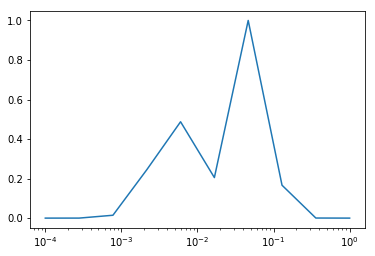

In [2]:
mg = [[5e-3,0.7,0.5],[5e-2,0.5,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,10) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
#plt.xlabel('inverse time [s]')
#plt.ylabel('amplitude')
plt.xscale('log')
#plt.grid(True)
#plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Tabela_mM_10pt.png',dpi=300)

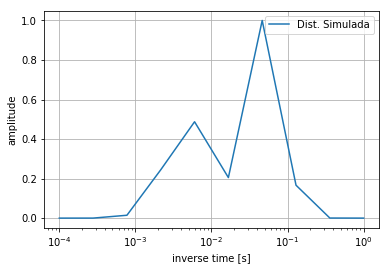

In [5]:
mg = [[5e-3,0.7,0.5],[5e-2,0.5,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,10) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Sim_Dist_mM_10pt.png',dpi=300)

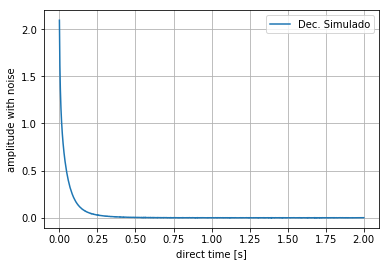

In [6]:
# SNR = 100.000

sig1 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig1.genX(1e-4,2,2000) #xi, xf, N
sig1.genY()
sig1.addGaussNoise(1e5)
#sig1.plotData()

plt.plot(sig1.x,sig1.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e5_mM_10pt.png',dpi=300)

In [5]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,10) #Xi, Xf, N

Opt1 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg1)
print Opt1

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.0015381514411415896, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.001528825181676255, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.0014520241808480701, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.0009380236419024815, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.0009372552375119683, 1e-08, 8.362510309503733e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.0009309282775931875, 1e-08, 6.993157867655623e-07, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.0008852628310380153, 1e-08, 5.848035476425729e-06, 5.848035476425729e-06]
Laço  8.3625103095e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.0008851922391111766, 8.362510309503733e-08, 5.848035476425729e-06, 5.848035476425729e-06]
Laço  6.99315786766e-07  da varredura em Ns.
Última otimização do ajuste gro

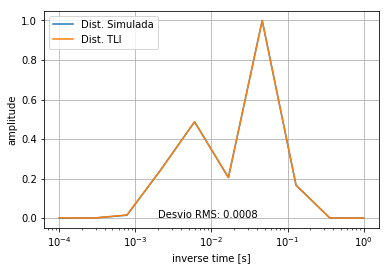

In [7]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,10) #Xi, Xf, N
reg1.genY([5.848035476425729e-06, 7.404433727112819e-06, 7.404433727112819e-06], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg1.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg1.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg1.X,reg1.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0008')
plt.savefig('Sim_Comp_1e5_mM_10pt.png',dpi=300)

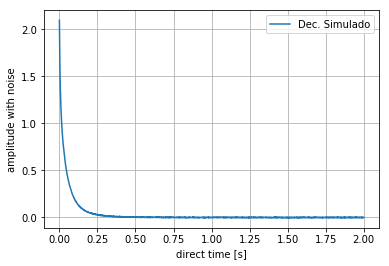

In [8]:
# SNR = 10.000

sig2 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig2.genX(1e-4,2,2000) #xi, xf, N
sig2.genY()
sig2.addGaussNoise(1e4)
#sig2.plotData()

plt.plot(sig2.x,sig2.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e4_mM_10pt.png',dpi=300)

In [8]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,10) #Xi, Xf, N

Opt2 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg2)
print Opt2

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.0037312017710072337, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.0037259522114975107, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.003682229130868286, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.0033300253793850754, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.0023693600753159506, 1e-08, 1e-08, 4.8904256961953734e-05]
Laço  8.3625103095e-08  da varredura em Ns.
Laço  6.99315786766e-07  da varredura em Ns.
Laço  5.84803547643e-06  da varredura em Ns.
Laço  4.8904256962e-05  da varredura em Ns.
Laço  0.000408962353023  da varredura em Ns.
Laço  0.00341995189335  da varredura em Ns.
Laço  0.0285993829662  da varredura em Ns.
Laço  0.2391626349  da varredura em Ns.
Laço  2.0  da varredura em Ns.
Laço  1e-08  da varredura em N.
Laço  1.26614035721e-08  da varredura em N.
Laço  1.60311140416e-08  da varredur

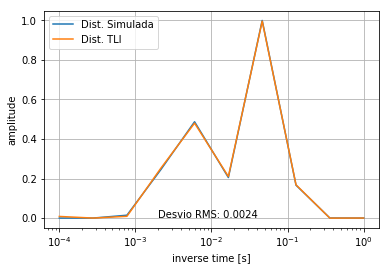

In [9]:
reg2 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,10) #Xi, Xf, N
reg2.genY([1e-08, 1e-08, 4.8904256961953734e-05], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg2.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg2.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg2.X,reg2.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0024')
plt.savefig('Sim_Comp_1e4_mM_10pt.png',dpi=300)

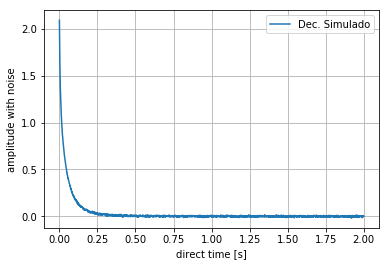

In [10]:
# SNR = 1.000

sig3 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig3.genX(1e-4,2,2000) #xi, xf, N
sig3.genY()
sig3.addGaussNoise(1e3)
#sig3.plotData()

plt.plot(sig3.x,sig3.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e3_mM_10pt.png',dpi=300)

In [11]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,10) #Xi, Xf, N

Opt3 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg3)
print Opt3

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.009459430841651547, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.00945560581883343, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.00784399540936196, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.007841311963933534, 1e-08, 8.362510309503733e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.007819011808397416, 1e-08, 6.993157867655623e-07, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.007641728403146405, 1e-08, 5.848035476425729e-06, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.0065771742586250665, 1e-08, 4.8904256961953734e-05, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.0037208448499604463, 1e-08, 0.0004089623530229578, 1e-08]
Última otimização do ajuste grosso:  [0.003719466318221663, 1e-08, 0.0004089623530229578, 8.362510309503733e-08]
Última otimização do aju

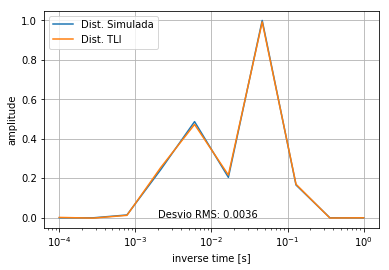

In [11]:
reg3 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,10) #Xi, Xf, N
reg3.genY([9.926410247366816e-05, 0.0004089623530229578, 5.848035476425729e-06], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg3.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg3.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg3.X,reg3.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0036')
plt.savefig('Sim_Comp_1e3_mM_10pt.png',dpi=300)

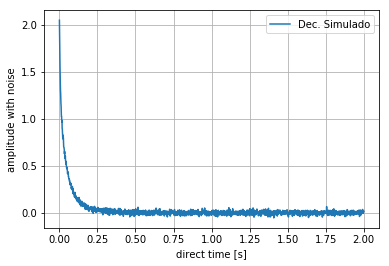

In [12]:
# SNR = 100

sig4 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig4.genX(1e-4,2,2000) #xi, xf, N
sig4.genY()
sig4.addGaussNoise(1e2)
#sig4.plotData()

plt.plot(sig4.x,sig4.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e2_mM_10pt.png',dpi=300)

In [14]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,10) #Xi, Xf, N

Opt4 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg4)
print Opt4

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.05094725391740629, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.05094205882000277, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.05089862803943367, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.05053636471579844, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.047570744796778676, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.026806688198970488, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.02680576586375854, 1e-08, 8.362510309503733e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.026798053610162145, 1e-08, 6.993157867655623e-07, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.026733614542073823, 1e-08, 5.848035476425729e-06, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.026198578829727565, 1e-08,

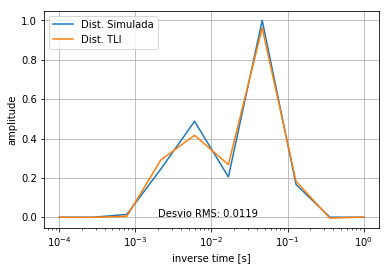

In [13]:
reg4 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,10) #Xi, Xf, N
reg4.genY([6.993157867655623e-07, 0.00341995189335339, 6.19196533790181e-05], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg4.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg4.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg4.X,reg4.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0119')
plt.savefig('Sim_Comp_1e2_mM_10pt.png',dpi=300)

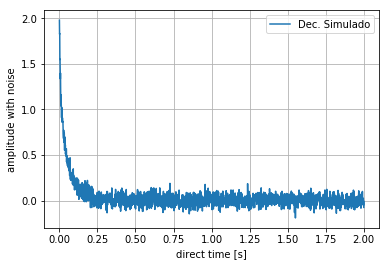

In [14]:
# SNR = 10

sig5 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig5.genX(1e-4,2,2000) #xi, xf, N
sig5.genY()
sig5.addGaussNoise(10)
#sig5.plotData()

plt.plot(sig5.x,sig5.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e1_mM_10pt.png',dpi=300)

In [17]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,10) #Xi, Xf, N

Opt5 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg5)
print Opt5

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.13180613388534043, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.13180515364048048, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.13179695683216594, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.13172844586072482, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.1311579538297162, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.11951761694586534, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.02504817467976114, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.025048107345208986, 1e-08, 8.362510309503733e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.02504754451675267, 1e-08, 6.993157867655623e-07, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.02504285576704902, 1e-08, 5.848035476425729e-06, 0.0

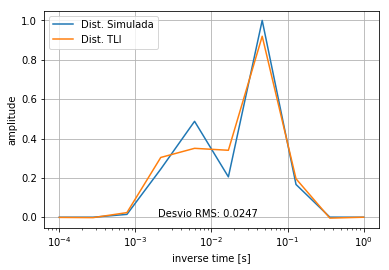

In [15]:
reg5 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,10) #Xi, Xf, N
reg5.genY([0.0008300970802996849, 0.0010510194137716641, 0.00341995189335339], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg5.plotData()
#plt.show()
#print 'Desvio quadrático médio:', '{:.2e}'.format(lp.rmsDiff(sim.Y, reg5.Y))

plt.plot(sim.X,sim.Y)
plt.plot(reg5.X,reg5.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0247')
plt.savefig('Sim_Comp_1e1_mM_10pt.png',dpi=300)